In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [0]:
train = pd.read_csv("tcd ml 2019-20 income prediction training (with labels).csv")
test = pd.read_csv("tcd ml 2019-20 income prediction test (without labels).csv")

In [69]:
train_ID = train['Instance']
test_ID = test['Instance']

#drop id
train.drop("Instance", axis = 1, inplace = True)
test.drop("Instance", axis = 1, inplace = True)
train.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income in EUR
0,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
1,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
2,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
3,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
4,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217


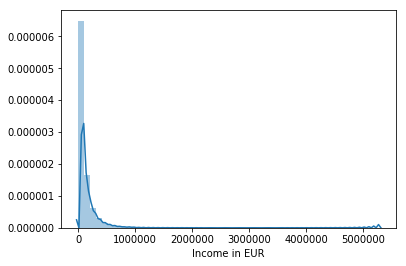

In [70]:
#check saleprice(target value)
sns.distplot(train['Income in EUR']);

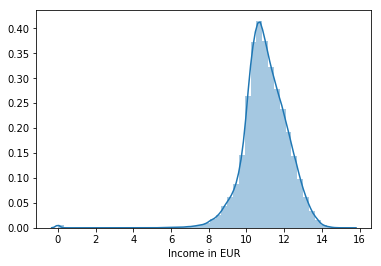

In [71]:
train["Income in EUR"] = train["Income in EUR"].map(lambda i:np.log(i) if i>0 else 0)
sns.distplot(train['Income in EUR']);

In [0]:
ntrain = train.shape[0] # number of training
ntest = test.shape[0] #number of test
y_train = train['Income in EUR'].values #value of saleprice

In [73]:
#concat train/test data
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Income in EUR'], axis=1, inplace=True)
all_data.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(185223, 11)

In [74]:
#check null values 
all_na = (all_data.isnull().sum() / len(all_data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

,Missing Ratio
Income,100.000000
Gender,6.637405
University Degree,6.601232
Hair Color,6.563980
Age,0.417335
Year of Record,0.397359
Profession,0.279123


In [75]:
all_data["Gender"].value_counts()

male       70968
female     44913
other      44674
unknown    11195
0           1179
Name: Gender, dtype: int64

In [0]:
all_data["Gender"] = all_data["Gender"].fillna("None")

In [77]:
all_data["Gender"].value_counts()

male       70968
female     44913
other      44674
None       12294
unknown    11195
0           1179
Name: Gender, dtype: int64

In [78]:
all_data["University Degree"].value_counts()

Bachelor    71086
Master      44831
No          44697
PhD         11226
0            1156
Name: University Degree, dtype: int64

In [0]:
all_data["University Degree"] = all_data["University Degree"].fillna("None")

In [80]:
all_data["University Degree"].value_counts()

Bachelor    71086
Master      44831
No          44697
None        12227
PhD         11226
0            1156
Name: University Degree, dtype: int64

In [81]:
all_data["Hair Color"].value_counts()

Black      71047
Brown      44920
Blond      44645
Red        11335
Unknown     1073
0             45
Name: Hair Color, dtype: int64

In [0]:
all_data["Hair Color"] = all_data["Hair Color"].fillna("None")

In [83]:
all_data["Hair Color"].value_counts()

Black      71047
Brown      44920
Blond      44645
None       12158
Red        11335
Unknown     1073
0             45
Name: Hair Color, dtype: int64

In [84]:
all_data["Profession"].value_counts()

principal administrative associate                 404
quality child care manager                         397
power plant operator                               395
pipelayer                                          394
preplacement nurse practitioner                    392
project planner                                    392
plan management specialist                         391
procurement clerk                                  388
production support                                 388
payroll data associate                             386
procedural justice coordinator                     385
probation officer                                  384
portfolio manager                                  384
personal and home care aide                        384
public records aide                                384
photogrammetrist                                   384
plumber's helper                                   383
process server                                     383
podiatrist

In [0]:
all_data["Profession"] = all_data["Profession"].fillna("None")

In [86]:
all_data["Profession"].value_counts()

None                                               517
principal administrative associate                 404
quality child care manager                         397
power plant operator                               395
pipelayer                                          394
preplacement nurse practitioner                    392
project planner                                    392
plan management specialist                         391
procurement clerk                                  388
production support                                 388
payroll data associate                             386
procedural justice coordinator                     385
portfolio manager                                  384
personal and home care aide                        384
probation officer                                  384
photogrammetrist                                   384
public records aide                                384
plumber's helper                                   383
process se

In [0]:
all_data.fillna(all_data.mean(), inplace=True)

In [88]:
#check null values 
all_na = (all_data.isnull().sum() / len(all_data)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_na})
missing_data.head(20)

,Missing Ratio
Income,100.0


In [0]:
num_strong_corr = ['Income in EUR','Yeaf of Record', 'Age','Size of City','Body Height [cm]']

num_weak_corr = ['Wears Glasses']

catg_strong_corr = ['Gender', 'Profession', 'University Degree','Country']

catg_weak_corr =  ['Hair Color']

In [0]:
to_drop_num  = num_weak_corr
to_drop_catg = catg_weak_corr

cols_to_drop = to_drop_num + to_drop_catg 

In [0]:
all_data.drop(['Wears Glasses','Hair Color'], axis=1, inplace=True)

In [0]:
all_data = pd.get_dummies(all_data, columns=['Gender','Profession','University Degree', 'Country'])

In [0]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [94]:
all_data.isnull().sum()

Age                                         0
Body Height [cm]                            0
Income                                 185223
Size of City                                0
Year of Record                              0
Gender_0                                    0
Gender_None                                 0
Gender_female                               0
Gender_male                                 0
Gender_other                                0
Gender_unknown                              0
Profession_.net developer                   0
Profession_.net software developer          0
Profession_Accountant                       0
Profession_Accounts Assistant               0
Profession_Accounts Clerk                   0
Profession_Accounts Manager                 0
Profession_Accounts Staff                   0
Profession_Acoustic Engineer                0
Profession_Actor                            0
Profession_Actress                          0
Profession_Actuary                

In [0]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

In [0]:
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))

In [0]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [0]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
params = {'coef0':[0, 0.1, 0.5, 1], 'C' :[0.1, 0.2, 0.5, 1], 'epsilon':[i/10.0 for i in range(0,6)]}

In [0]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=150, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
param_grid = [
    {'n_estimators': [3, 10, 30, 60, 90], 'max_features': [50,100,150,200,250,300]},
    {'bootstrap': [True], 'n_estimators': [3, 10, 30, 60, 90], 'max_features': [50,100,150,200,250]},
]

In [107]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/numpy/lib/nanfunctions.py:959: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: ignored

In [0]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

In [0]:
import xgboost
regressor = xgboost.XGBRegressor(colsample_bytree = 0.4603, learning_rate = 0.06, min_child_weight = 1.8,
                                 max_depth= 3, subsample = 0.52, n_estimators = 2000,
                                 random_state= 7, ntrhead = -1)
regressor.fit(X_tr,y_tr)

In [0]:
y_hat = regressor.predict(X_tr)

plt.scatter(y_tr, y_hat, alpha = 0.2)
plt.xlabel('Targets (y_tr)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [0]:
regressor.score(X_tr,y_tr)

In [0]:
y_hat_test = regressor.predict(X_vld)


plt.scatter(y_vld, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_vld)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [0]:
regressor.score(X_vld,y_vld)

In [0]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_tr, y = y_tr, cv = 3)

In [0]:
print(accuracies.mean())
print(accuracies.std())

In [0]:
use_logvals = 1

pred_xgb = regressor.predict(X_test)

sub_xgb = pd.DataFrame()
sub_xgb['Instance'] = id_test
sub_xgb['Income'] = pred_xgb

if use_logvals == 1:
    sub_xgb['Income'] = np.exp(sub_xgb['Income']) 

sub_xgb.to_csv('xgb.csv',index=False)